Heart Disease - Exploratory Data Analysis - Team 33

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


Upload dataset, import libraries and carry out basic data preparation

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



1. age: age in years
2. sex:
0 = Female
1 = Male
3. cp: Chest pain types
0 = Typical angina
1 = Atypical angina
2 = Non-angina pain
3 = Asymptomatic
4. trestbps: Resting blood pressure (mmHg)
High blood pressure = 140 mmHg or above
5. chol: Serum cholestoral (mg/dL)
Certain elements in the blood, including low-density lipoprotein (LDL), high-density lipoprotein (HDL) and triglycerides
Calculation = HDL + LDL + 0.2 * triglycerides
Higher than 200 mg/dL is concerned
6. fbs: Fasting blood sugar (> 120 mg/dL)
0 = False
1 = True
Higher than 126 mg/dL points to diabetes
7. restecg: Resting electrocardiographic results
0 = Normal
1 = Abnormal ST-T wave
2 = Showing probable or definite left ventricular hypertrophy
8. thalach: Maximum heart rate achieved (bpm)
9. exang: Exercise induced angina
0 = Negative
1 = Positive
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
0 = Upsloping
1 = Horizontal
2 = Downsloping
12. ca: Number of major vessels (0-3) colored by fluoroscopy
The colored blood vessels are passing through
There is a clot if the blood vessel is not colored
13. thal: Thallium scintigraphy
3 = Normal
6 = Fixed defect
7 = Reversable defect
14. target: Heart Disease
0 = Benign
1 = Malignant

In [ ]:
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 
              'Cholesterol', 'Fasting_bs', 'Resting_ecg', 
              'Max_heart_rate', 'Exercise_induced_angina', 
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

1. age --> Age
2. sex --> Sex
3. cp --> Chest_pain_type
4. trestbps --> Resting_bp
5. chol --> Cholesterol
6. fbs --> Fasting_bs
7. restecg --> Resting_ecg
8. thalach --> Max_heart_rate
9. exang --> Exercise_induced_angina
10. oldpeak --> ST_depression
11. slope --> ST_slope
12. ca --> Num_major_vessels
13. thal --> Thallium_test
14. target --> Condition

In [ ]:
df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()
print()
print(f"Shape of Dataset")
print(f"Number of Features:{df.shape[1]}")
print(f"Number of Observations: {df.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain_type          303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_bs               303 non-null    int64  
 6   Resting_ecg              303 non-null    int64  
 7   Max_heart_rate           303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Num_major_vessels        303 non-null    int64  
 12  Thallium_test            303 non-null    int64  
 13  Condition                303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          0
Thallium_test              0
Condition                  0
dtype: int64

Plotting pie chart with target variable of Condition.
0 indicates Benign and 1 indicates Malignant.

In [ ]:
def condition_ratio(data):
  results = data['Condition'].value_counts()
  values = [results[0], results[1]]
  labels = ['Benign', 'Malignant']
  colors = ['MediumSeaGreen', 'LightCoral']
    
  fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
  py.iplot([fig_pie])
  return py
    
    
condition_ratio(df);

Pie chart shows majority of tumours are diagnosed as malignant.


Plotting pie chart with variable of Sex. 0 is Female, 1 is Male.

In [ ]:
def sex_ratio(data):
    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']
    
    fig_pie = go.Pie(labels=labels, values=values, 
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py

    
sex_ratio(df);

There are significantly more males than females affected.

Plotting bar chart for the proportion of males and females diagnosed with malignant tumours.

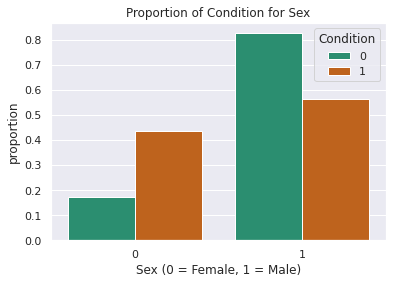

The proportion of Malignant for Sex:
Female: 43.64%
Male: 56.36%


In [ ]:
def condition_proportion_sex(data):         
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()
    
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')

    
condition_proportion_sex(df);

Of all people diagnosed with malignant tumours just over half of them are male. 

Identifying risk factors for heart disease and plotting graphs/tables to visualise them.

Risk Factor 1 = Fasting blood sugar levels over 120mg/dl

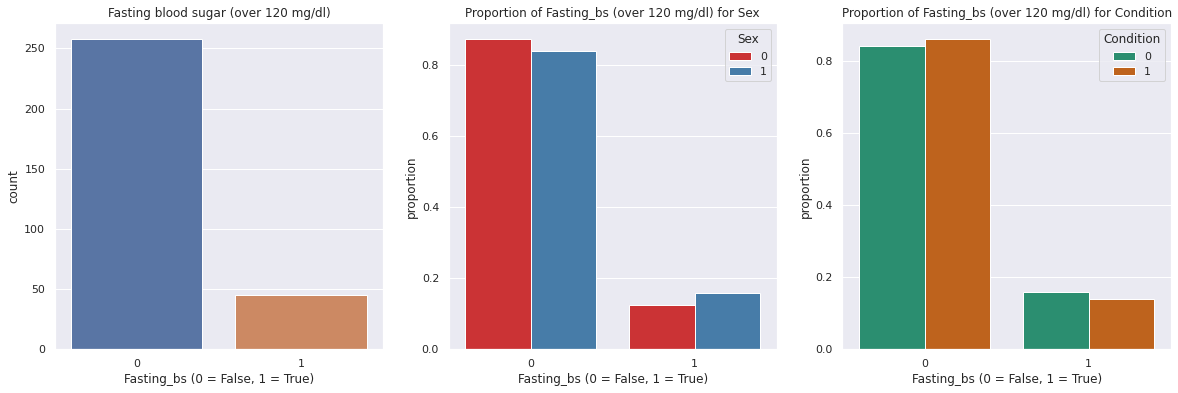

In [ ]:
def risk_factors_fbs(data): 
    fig = plt.figure(figsize=(20, 6))
    
    # Fasting blood sugar > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x='Fasting_bs', data=data)
    plt.title('Fasting blood sugar (over 120 mg/dl)')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    
    
    # Fasting blood sugar for Sex
    plt.subplot(1, 3, 2)
    df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Sex')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    
    
    # Fasting blood sugar for Condition
    plt.subplot(1, 3, 3)
    df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Condition')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    plt.show()

    
risk_factors_fbs(df);

There are considerably more occurances of blood sugar levels being below 120 mg/dl. For those with high blood suagr levels, it is slighlty more likely to be in a male patient. For those with healthy blood sugar levels, the tumours diagnosed are sligtly more likely to be malignant.

Risk Factor 2 = Resting blood pressure (mmHg)

Normal = <120 systolic and <80 diastolic

Elevated = 120-129 systolic and <80 diastolic

Hypertension (Stage1) = 130-139 systolic or 80-89 diastolic

Hypertension (Stage2) = >140 systolic or >90 diastolic

Hypertensive Crisis = >180 systolic and/or >120 diastolic



Risk Factor 3 = Serum Cholesterol (mg/dL)

Normal range for serum cholesterol is 125-200 mg/dL

Risk Factor 4 = Max heart rate (bpm)

Normal resting is 60-100 bpm. Rough approximation of max is 220 - age. 

Plotting visualisations of risk factors 2 - 4

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

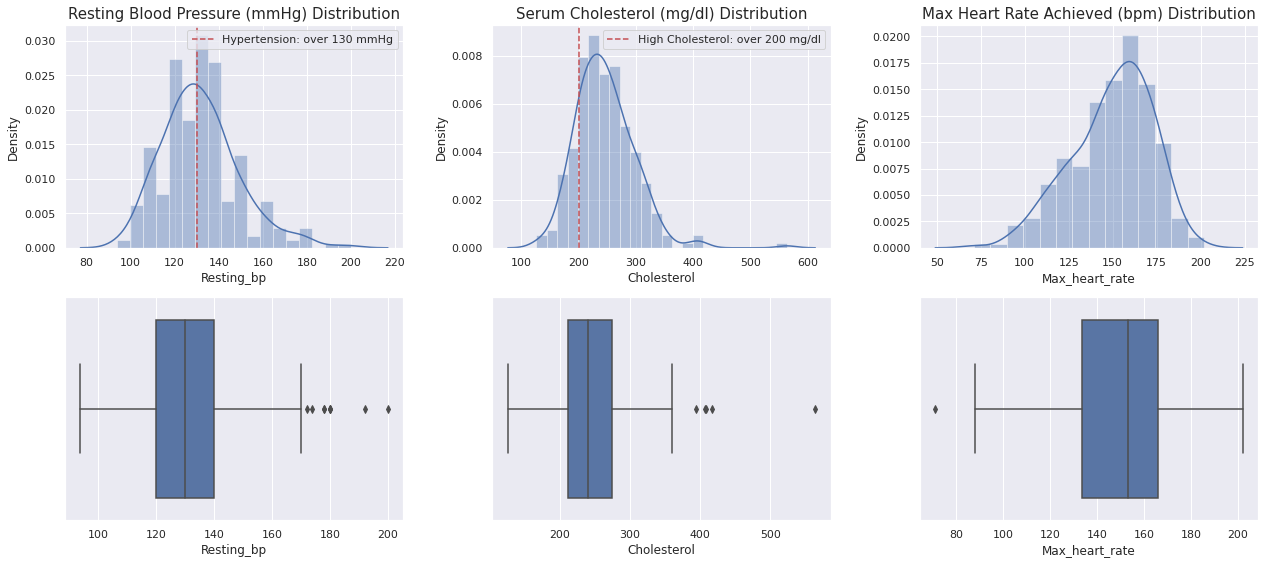

In [ ]:
def risk_factors_dist(data):
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.distplot(data['Resting_bp'])
    plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()
    
    plt.subplot(2, 3, 4)
    sns.boxplot(data['Resting_bp'], orient='h')   
        
        
    # Serum cholesterol 
    plt.subplot(2, 3, 2)
    sns.distplot(data['Cholesterol'])
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()
    
    plt.subplot(2, 3, 5)
    sns.boxplot(data['Cholesterol'], orient='h')
  
    
    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.distplot(data['Max_heart_rate'])
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)
    
    plt.subplot(2, 3, 6)
    sns.boxplot(data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()
    
    
risk_factors_dist(df);

Cholesterol has extreme outlier. Resting blood pressure and cholestrol slightly right skewed. Max heart rate is left skewed. 

Bulk of blood pressure measurements are on and around 130 mmHg. Mean for cholesterol would be categorised as high. 

Plotting visualisation for these risk factors separted by sex.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

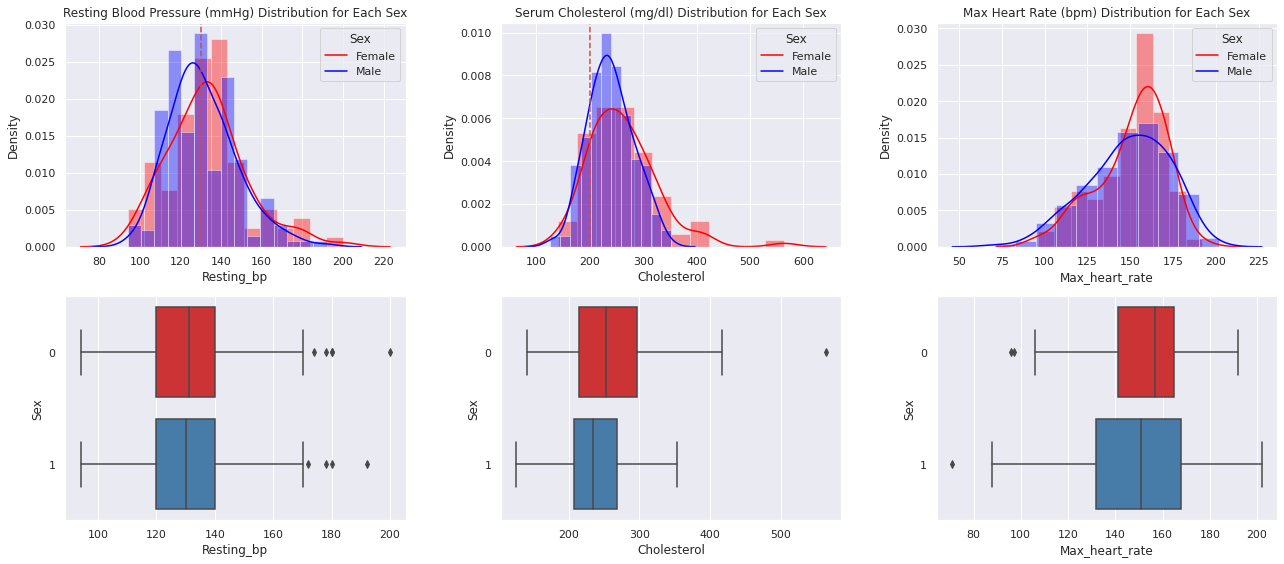

In [ ]:
def risk_factors_dist_sex(data):
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['Resting_bp']
    trestbps_male = data[data['Sex']==1]['Resting_bp']
    sns.distplot(trestbps_female, color='Red')   
    sns.distplot(trestbps_male, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    
    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'], 
                palette='Set1', orient='h')
    
    
    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholesterol']
    chol_male = data[data['Sex']==1]['Cholesterol']
    sns.distplot(chol_female, color='Red')   
    sns.distplot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    
    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'], 
                palette='Set1', orient='h')
    
    
    # Max heart rate distribution for each sex 
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['Max_heart_rate']
    thalach_male = data[data['Sex']==1]['Max_heart_rate']
    sns.distplot(thalach_female, color='Red')   
    sns.distplot(thalach_male, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'], 
                palette='Set1', orient='h')
    
    plt.tight_layout()
    plt.show()
    
    
risk_factors_dist_sex(df);

Most women are distributed over 130mmHg blood pressure, more so than men.
Male and female cholesterol are both right skewed, but women have more extreme values.
Max heart rate is left skewed for both genders and bulk fall within 150-200bpm. 

Plotting visualisations for these risk factors separated by condition.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

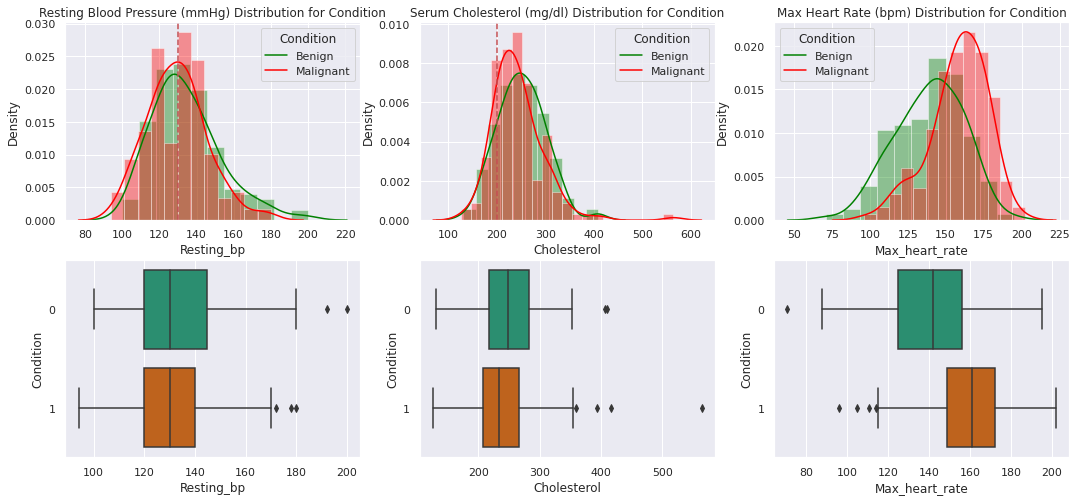

In [ ]:
def risk_factors_dist_condition(data):
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure distribution for each condition
    plt.subplot(2, 3, 1)
    trestbps_b = data[data['Condition']==0]['Resting_bp']
    trestbps_m = data[data['Condition']==1]['Resting_bp']
    sns.distplot(trestbps_b, color='Green')   
    sns.distplot(trestbps_m, color='Red')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])  
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    
    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Condition'], 
                orient='h', palette='Dark2')
    
    
    # Serum cholesterol distribution for each condition
    plt.subplot(2, 3, 2)
    chol_b = data[data['Condition']==0]['Cholesterol']
    chol_m = data[data['Condition']==1]['Cholesterol']
    sns.distplot(chol_b, color='Green')
    sns.distplot(chol_m, color='Red')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Condition'],
                orient='h', palette='Dark2')
    
    
    # Max heart rate achieved distribution for each condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['Max_heart_rate']
    thalach_m = data[data['Condition']==1]['Max_heart_rate']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Condition'],
                orient='h', palette='Dark2')
    
    
risk_factors_dist_condition(df);

There is no significant difference in resting blood pressure between those with benign and those with malignant tumours. 
The highest cholesterol levels relate to those with malignant tumours.
Those with malignant tumours recorded higher max heart rate than those with benign tumours.